In [1]:
import random
import torch
from torch import Tensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Download MNIST dataset

In [2]:
mnist_trainset = datasets.MNIST(root='./dataset', train=True, download=True,  transform = transforms.ToTensor(),)
mnist_testset = datasets.MNIST(root='./dataset', train=False, download=True,  transform = transforms.ToTensor(),)
print(len(mnist_trainset))
print(len(mnist_testset))

60000
10000


In [3]:
batch_size = 32
train_loader = DataLoader(mnist_trainset, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size = batch_size, shuffle=True)

torch.Size([32, 1, 28, 28])
torch.Size([32])


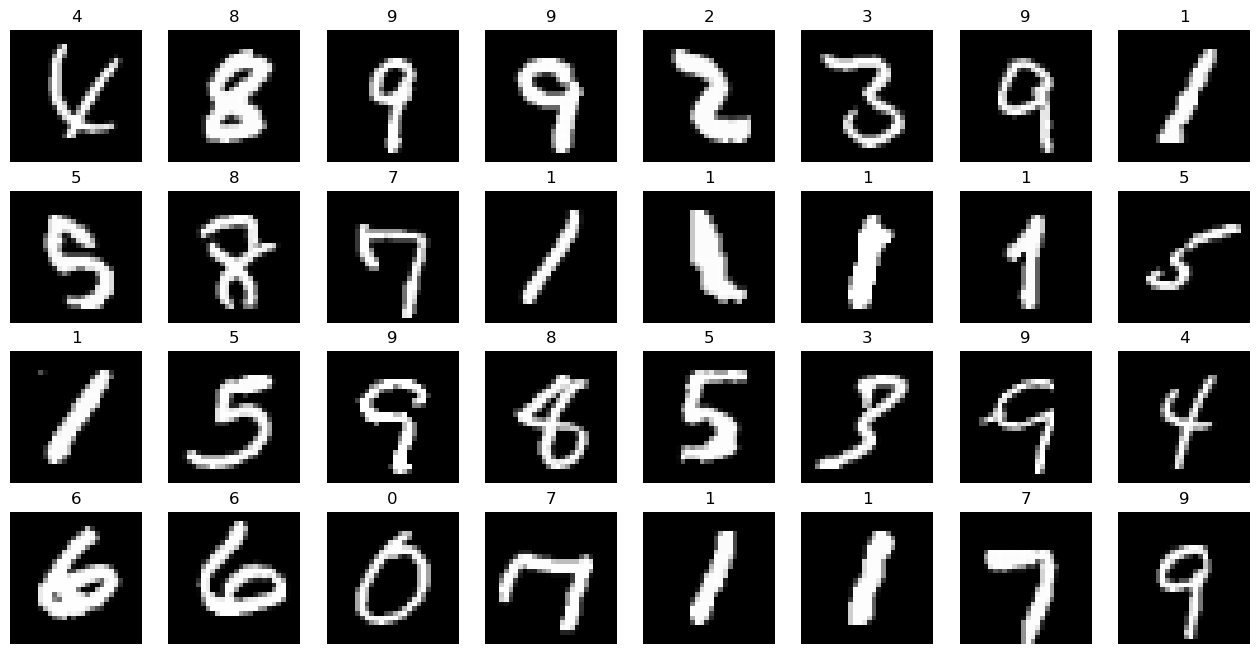

In [4]:
for data, labels in train_loader:
    print(data.shape)
    print(labels.shape)
    figure = plt.figure(figsize=(16, 8))
    cols, rows = 8, 4
    for index in range(0, 32):
        figure.add_subplot(rows, cols, index + 1)
        plt.title(labels[index].item())
        plt.axis("off")
        plt.imshow(data[index].squeeze(), cmap="gray")
    plt.show()
    break

## train_perceptron function

In [5]:
def sigmoid(z: Tensor):
    return 1 / (1 + torch.exp(-z))
    
def train_perceptron(X: Tensor, W: Tensor, b: Tensor, y_true: Tensor, mu: float):
    delta = torch.zeros(W.shape).to('cuda')
    beta = torch.zeros(b.shape).to('cuda')
    batch_size = len(X)
    for index in range(0, batch_size):
        z = X[index] @ W + b
        y = sigmoid(z)
        error = y_true[index] - y
        delta += X[index].unsqueeze(-1) @ error.unsqueeze(0)
        beta += error
    W += delta / batch_size * mu
    b += beta / batch_size * mu
    return W, b

## Initialize weights and biases

In [6]:
W = torch.rand((784, 10)).to('cuda')
b = torch.rand((10)).to('cuda')
mu = 0.1
epochs = 5

## Evaluate untrained model

In [7]:
def evaluate_model():
    correct = 0
    total = len(test_loader.dataset)
    for batch in test_loader:
        inputs, labels = batch
        batch_size = len(inputs)
        X = inputs.reshape(batch_size, -1).to('cuda')
        y_true = torch.zeros((batch_size, 10)).to('cuda')
        for index in range(batch_size):
            y_true[index][labels[index].item()] = 1
            z = X[index] @ W + b
            y = sigmoid(z)
            prediction = torch.argmax(y).item()
            if prediction == torch.argmax(y_true[index]).item():
                correct += 1
    print(f'Accuracy: {correct / total}')

In [8]:
evaluate_model()

Accuracy: 0.0984


## Start training

In [9]:
for epoch in range(1, epochs + 1):
    epoch_batch = 1
    print(f"Epoch: {epoch}")
    for batch in train_loader:
        inputs, labels = batch
        batch_size = len(inputs)
        X = inputs.reshape(batch_size, -1).to('cuda')
        y_true = torch.zeros((batch_size, 10)).to('cuda')
        for index in range(batch_size):
            y_true[index][labels[index].item()] = 1
        W, b = train_perceptron(X, W, b, y_true, mu)
    evaluate_model()

Epoch: 1
Accuracy: 0.8964
Epoch: 2
Accuracy: 0.9057
Epoch: 3
Accuracy: 0.9099
Epoch: 4
Accuracy: 0.9104
Epoch: 5
Accuracy: 0.9123
